In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import adjusted_rand_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import numpy as np


# Project Background 

# Context:
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. 
They plan to use the same strategy on new markets and have identified 2627 new potential customers.

# My Challenge:
For my final project I will attempt to apply unsupervised learning methods to accurately recreate the model this car company created to classify its customers into their 4 segments. If my results are poor, I will switch to supervised methods. 

# Column Header Explanation:
ID: Unique Customer ID
Gender: Gender of Customer 
Ever_Married: Marital Status of Customer
Age: Age of Customer
Graduated: Whether or not customer is a graduate 
Profession: Customer generalized profession ex) engineer 
Work_Experience: Number of years spent in industry 
Spending_Score: Classification based on store spending 
Family_Size: Size of customers family 
Var_1: Store anonymous classification based on hidden criteria 
Segmentation: Which group A,B,C,D the customer is in. (Only exists in training data)

# Link to data: https://www.kaggle.com/datasets/vetrirah/customer/data


# Data EDA

In [2]:
data_train = pd.read_csv(r"D:\Customer_Segmentation_Project_UnsupervisedML\train.csv")
data_test = pd.read_csv(r"D:\Customer_Segmentation_Project_UnsupervisedML\test.csv")

In [3]:
print("The columns are: \n" , data_train.columns)
print("Data Overveiew: \n", data_train.head())
print("The number of rows and columns are: ", data_train.shape)

The columns are: 
 Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Data Overveiew: 
        ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0

In [4]:
print("The number of missing values are: \n", data_train.isnull().sum())

The number of missing values are: 
 ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [5]:
data_train.dropna(inplace=True)
print("The number of missing values are: \n", data_train.isnull().sum())
print("The number of rows and columns are: ", data_train.shape)

The number of missing values are: 
 ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64
The number of rows and columns are:  (6665, 11)


We lost 18% of our training data but we don't have any missing data. 

# Training Data Visualizations

C:\Users\blake\AppData\Local\Temp\ipykernel_40100\3011444438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_train, palette='Set2')


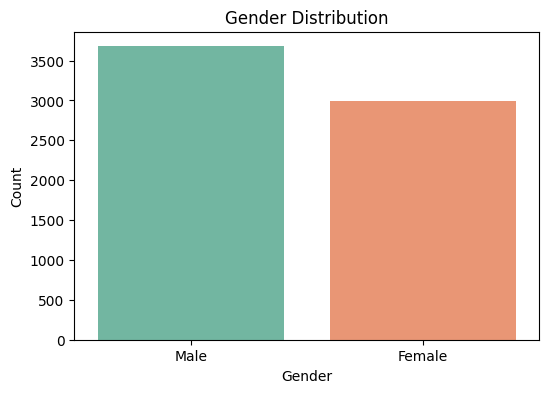

In [6]:
# Gender Distribution 
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data_train, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\blake\AppData\Local\Temp\ipykernel_40100\453427969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ever_Married', data=data_train, palette='Set1')


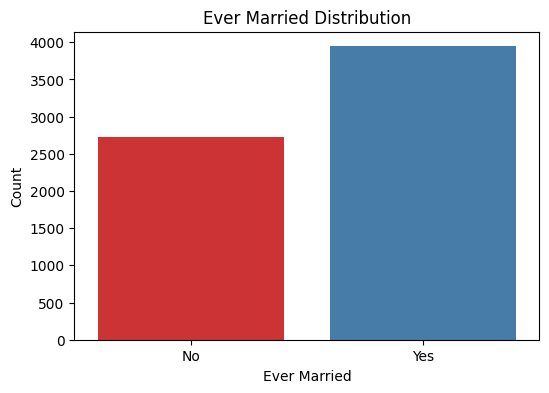

In [7]:
# Married Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Ever_Married', data=data_train, palette='Set1')
plt.title('Ever Married Distribution')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()


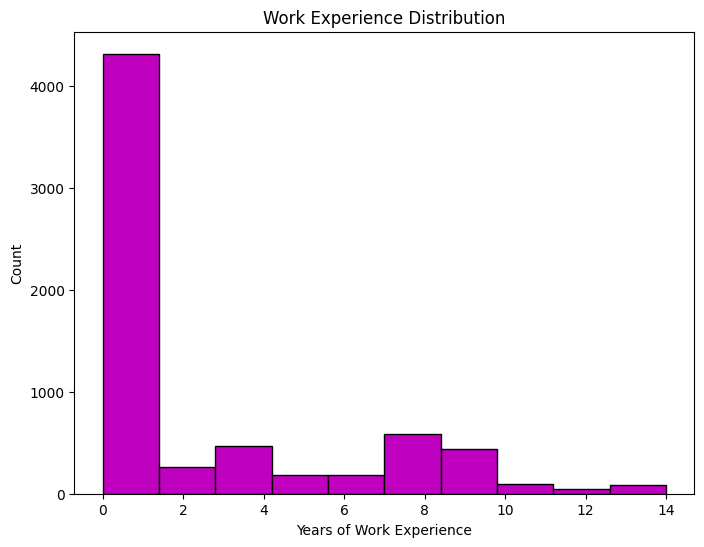

In [8]:
# Work Expierence Distribution 
plt.figure(figsize=(8,6))
plt.hist(data_train['Work_Experience'], bins=10, color='m', edgecolor='k')
plt.title('Work Experience Distribution')
plt.xlabel('Years of Work Experience')
plt.ylabel('Count')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_40100\3401417561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending_Score', data=data_train, palette='viridis', edgecolor='black')


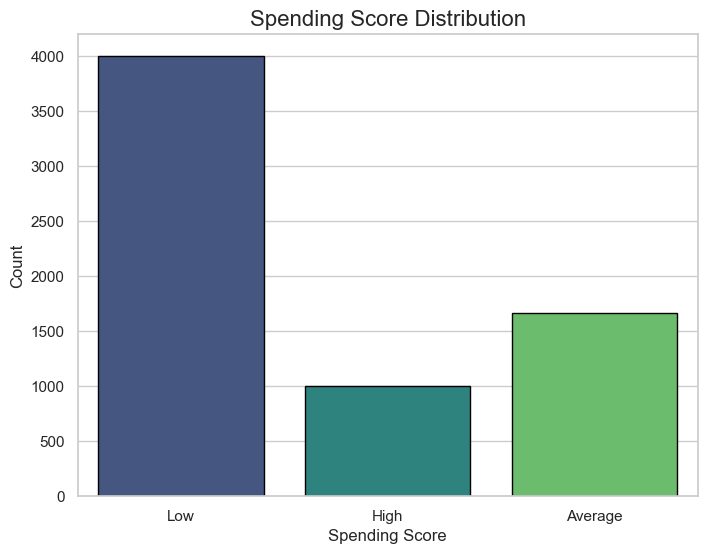

In [9]:
# Spending Score Distribution
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.countplot(x='Spending_Score', data=data_train, palette='viridis', edgecolor='black')
plt.title('Spending Score Distribution', fontsize=16)
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\Users\blake\AppData\Local\Temp\ipykernel_40100\3130327528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_Size', data=data_train, palette='viridis', edgecolor='black')


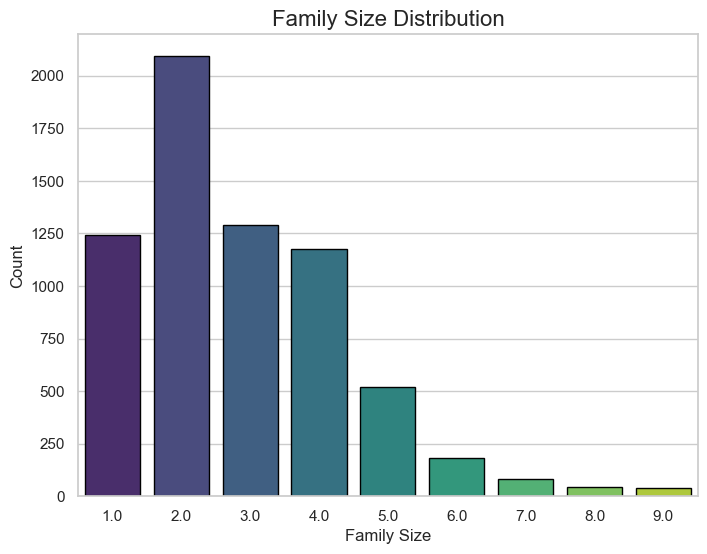

In [10]:
# Family Size Distribution
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.countplot(x='Family_Size', data=data_train, palette='viridis', edgecolor='black')
plt.title('Family Size Distribution', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Check for Outliers 

For this dataset there are 3 numerical columns the rest are binary. So I will check those with boxplots to see if their are extreme outliers than could be typos

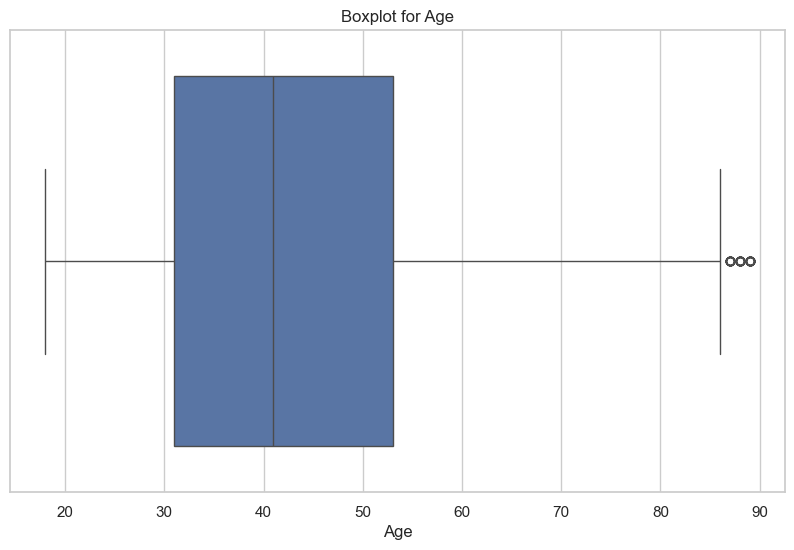

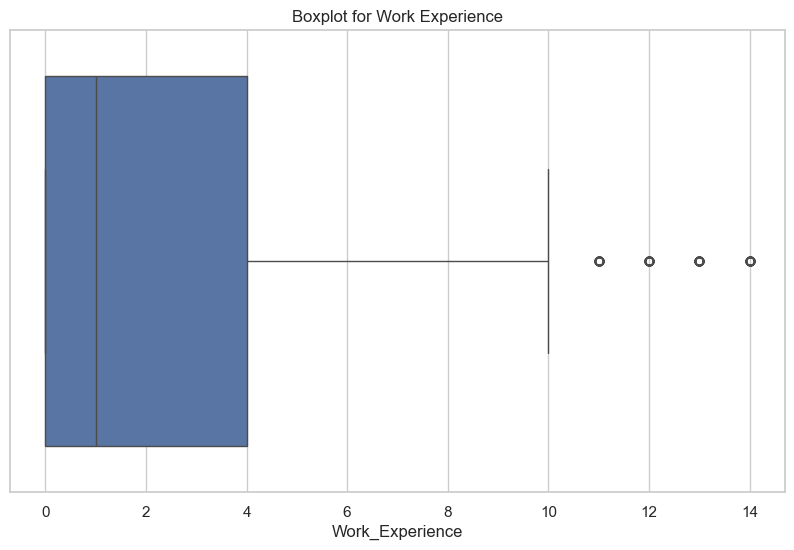

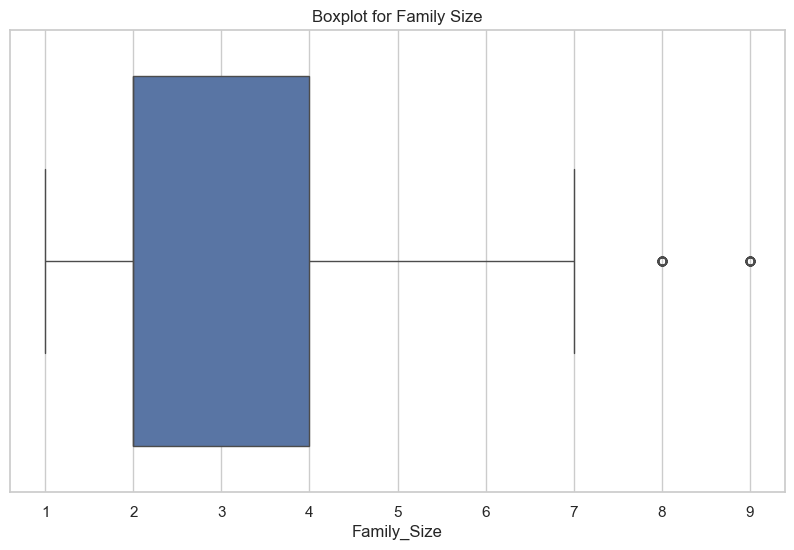

In [11]:
# Boxplot for Age
plt.figure(figsize=(10,6))
sns.boxplot(x=data_train['Age'])
plt.title('Boxplot for Age')
plt.show()

# Boxplot for Work_Experience
plt.figure(figsize=(10,6))
sns.boxplot(x=data_train['Work_Experience'])
plt.title('Boxplot for Work Experience')
plt.show()

# Boxplot for Family_Size
plt.figure(figsize=(10,6))
sns.boxplot(x=data_train['Family_Size'])
plt.title('Boxplot for Family Size')
plt.show()

The boxplots show no extreme outliers, the data is clean and ready for modeling.

# Unsupervised Machine Learning Techniques 
I will try three unsupervised machine learning techniques on the data to get a model that will be evaluated through Adjusted Rand Index (ARI). ARI will calculate the accuracy of each model by comparing my result to the “Segmentation” column 
which is the actual label on the ID being clustered. The three techniques used will be Kmeans, Gaussian Mixture Model and Hierarchical.  

Kmeans clustering assumes that the clusters of data are spherical and works by minimizing the variance within the clusters. The Gaussian Mixture Model assumes elliptical clusters and assigns points based on the probability that they  belong to each distribution. And lastly Hierarchical Clustering (Wards method) builds a tree of clusters, it works similar to Kmeans in that it minimizes variance, but it creates a diverging tree instead of assigning points to clusters directly. 


# Data Prep for Model building
For clustering algorithms like K-Means and Gaussian Mixture Models we need to transform data that is non-numerical. "Gender", "Ever_Married", "Graduated", "Profession" and "Var_1" will be transformed using one-hot encoding. This converts True/False to 1/0 
for the algorithm to function. 

In [12]:
# One-Hot Encode categorical variables
# Drop column with labeled data
data_encoded_unsupervised = pd.get_dummies(data_train.drop(columns=['Segmentation']), drop_first=True)

In [13]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded_unsupervised)

In [14]:
# Prep the data with PCA
# Component number based on amount of variance 90% here
pca = PCA(n_components=.90)  
data_pca = pca.fit_transform(data_scaled)

# Unsupervised Model Building

In [15]:
# K-Means Clustering with fixed random state and max iterations
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
kmeans_clusters = kmeans.fit_predict(data_pca)

# GMM Clustering 
gmm = GaussianMixture(n_components=4, random_state=42, max_iter=1000)
gmm_clusters = gmm.fit_predict(data_pca)

# Hierarchical Clustering (Ward's method)
Z = linkage(data_pca, method='ward')
hierarchical_clusters = fcluster(Z, t=4, criterion='maxclust')

# Unsupervised Model Evaluation 

In [16]:
ari_kmeans = adjusted_rand_score(data_train['Segmentation'], kmeans_clusters)
ari_gmm = adjusted_rand_score(data_train['Segmentation'], gmm_clusters)
ari_hierarchical = adjusted_rand_score(data_train['Segmentation'], hierarchical_clusters)

print(f"K-Means ARI: {ari_kmeans}")
print(f"GMM ARI: {ari_gmm}")
print(f"Hierarchical ARI: {ari_hierarchical}")

K-Means ARI: 0.08557432496295343
GMM ARI: 0.07054410368106342
Hierarchical ARI: 0.01665383840510758


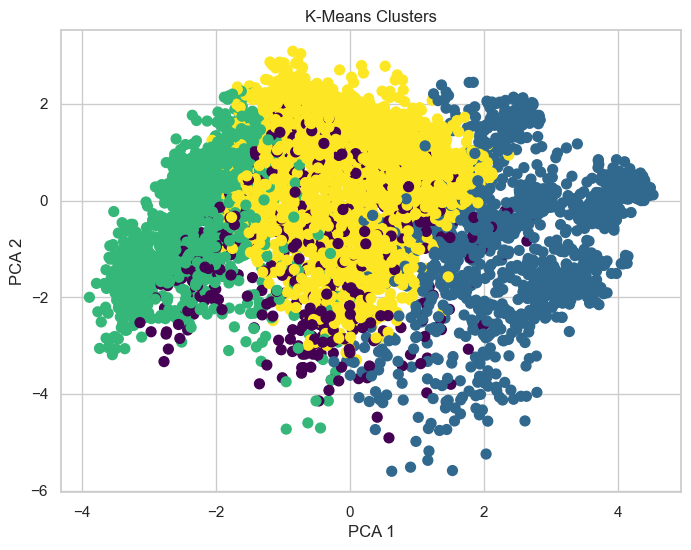

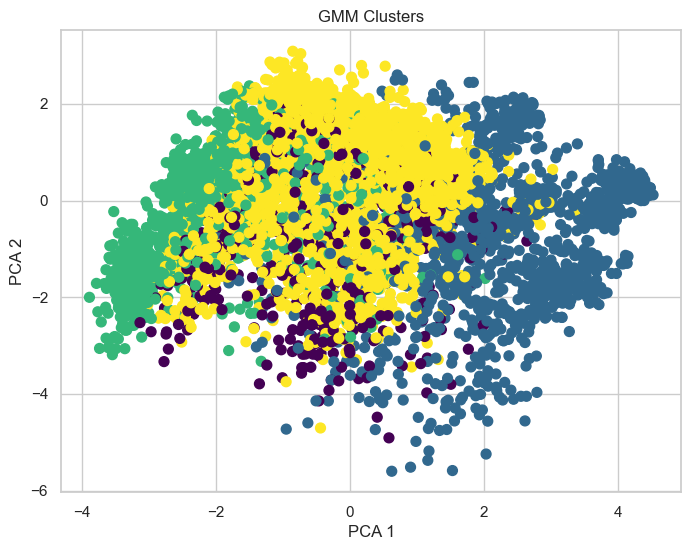

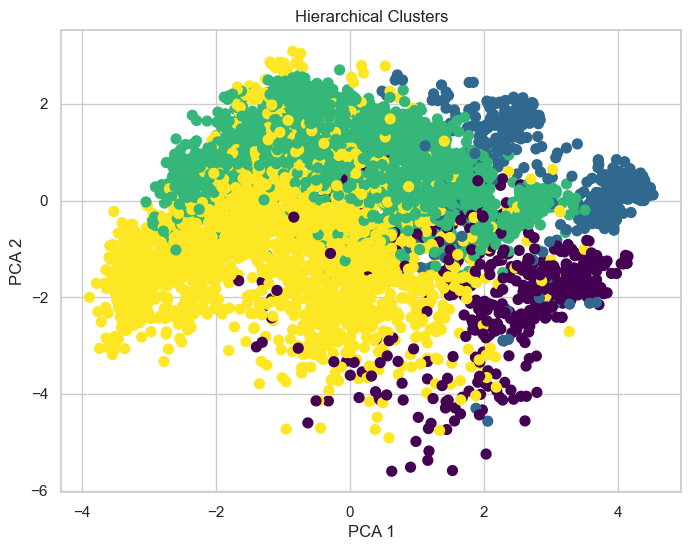

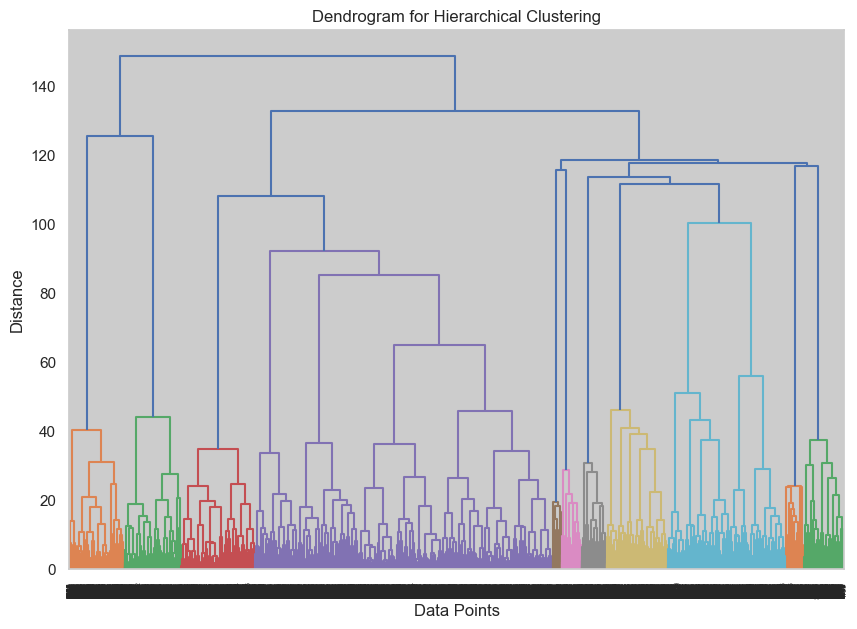

In [17]:
# Visualizations
# PCA-based visualization
def plot_clusters(pca_data, clusters, title):
    plt.figure(figsize=(8,6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Plot K-Means Clusters
plot_clusters(data_pca, kmeans_clusters, 'K-Means Clusters')

# Plot GMM Clusters
plot_clusters(data_pca, gmm_clusters, 'GMM Clusters')

# Plot Hierarchical Clusters
plot_clusters(data_pca, hierarchical_clusters, 'Hierarchical Clusters')

# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

All unsupervised methods worked very poorly for this dataset. Looking at the visuals for each technique I believe this is due to clustering overlap. 

The overlap in the clusters likely indicates that the features provided don't clearly distinguish the given segments in a way that unsupervised methods can capture. 

# Supervised Learning Methods

Logistic Regression

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Accuracy on training set after tuning: 0.52344336084021
Logistic Regression Accuracy on validation set after tuning: 0.5123780945236309

Classification Report on Training Data:
              precision    recall  f1-score   support

           A       0.43      0.50      0.47      1293
           B       0.42      0.22      0.29      1257
           C       0.53      0.66      0.58      1376
           D       0.66      0.68      0.67      1406

    accuracy                           0.52      5332
   macro avg       0.51      0.52      0.50      5332
weighted avg       0.51      0.52      0.51      5332


Classification Report on Validation Data:
              precision    recall  f1-score   support

           A       0.44      0.53      0.48       323
           B       0.33      0.18      0.23     

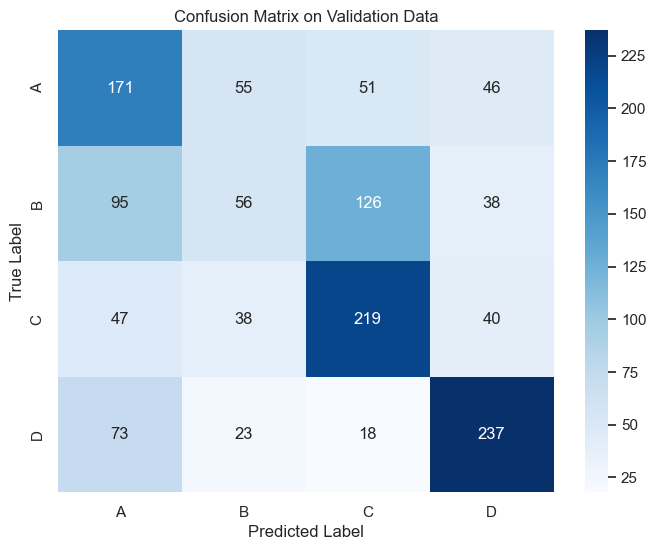

In [18]:
# One-Hot Encode categorical variables
# Drop column with labeled data temporarily
data_encoded = pd.get_dummies(data_train.drop(columns=['Segmentation']), drop_first=True)

# Preprocess the data for Logistic Regression
X_LR = data_encoded.drop(columns=["ID"])  # Drop the 'ID' column
y_LR = data_train['Segmentation']  # Target variable

# Split the data into training (80%) and validation (20%) sets
X_train_LR, X_val_LR, y_train_LR, y_val_LR = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42, stratify=y_LR)

# Scale the data for Logistic Regression
scaler_LR = StandardScaler()
X_train_scaled_LR = scaler_LR.fit_transform(X_train_LR)
X_val_scaled_LR = scaler_LR.transform(X_val_LR)

# Define the parameter grid for Logistic Regression
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Penalty type
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Different solvers
    'max_iter': [200, 500, 1000]  # Increase iteration limit for convergence
}

# Initialize Logistic Regression model
log_reg_LR = LogisticRegression(random_state=42)

# Set up the GridSearchCV for Logistic Regression
grid_search_LR = GridSearchCV(log_reg_LR, param_grid_LR, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with the training data
grid_search_LR.fit(X_train_scaled_LR, y_train_LR)

# Print the best parameters from the grid search
print(f"Best Parameters for Logistic Regression: {grid_search_LR.best_params_}")

# Make predictions on the training and validation sets using the best estimator
best_log_reg_LR = grid_search_LR.best_estimator_

# Predictions on training data
y_train_pred_LR = best_log_reg_LR.predict(X_train_scaled_LR)
train_accuracy_LR = accuracy_score(y_train_LR, y_train_pred_LR)
print(f"Logistic Regression Accuracy on training set after tuning: {train_accuracy_LR}")

# Predictions on validation data
y_val_pred_LR = best_log_reg_LR.predict(X_val_scaled_LR)
val_accuracy_LR = accuracy_score(y_val_LR, y_val_pred_LR)
print(f"Logistic Regression Accuracy on validation set after tuning: {val_accuracy_LR}")

# Classification report for training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train_LR, y_train_pred_LR))

# Classification report for validation data
print("\nClassification Report on Validation Data:")
print(classification_report(y_val_LR, y_val_pred_LR))

# Confusion Matrix for validation set
conf_matrix_LR = confusion_matrix(y_val_LR, y_val_pred_LR)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_LR, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val_LR), yticklabels=np.unique(y_val_LR))
plt.title('Confusion Matrix on Validation Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


CatBoost

0:	learn: 1.3381096	test: 1.3394758	best: 1.3394758 (0)	total: 192ms	remaining: 3m 11s
100:	learn: 0.7458521	test: 1.0521785	best: 1.0504086 (71)	total: 8.75s	remaining: 1m 17s
200:	learn: 0.5384821	test: 1.0714242	best: 1.0504086 (71)	total: 17.6s	remaining: 1m 9s
300:	learn: 0.4151264	test: 1.1005948	best: 1.0504086 (71)	total: 25.4s	remaining: 59s
400:	learn: 0.3329935	test: 1.1282936	best: 1.0504086 (71)	total: 33.2s	remaining: 49.6s
500:	learn: 0.2719166	test: 1.1558168	best: 1.0504086 (71)	total: 41s	remaining: 40.8s
600:	learn: 0.2304892	test: 1.1858386	best: 1.0504086 (71)	total: 48.9s	remaining: 32.4s
700:	learn: 0.1969283	test: 1.2125018	best: 1.0504086 (71)	total: 57.3s	remaining: 24.4s
800:	learn: 0.1702940	test: 1.2371897	best: 1.0504086 (71)	total: 1m 5s	remaining: 16.3s
900:	learn: 0.1472068	test: 1.2622777	best: 1.0504086 (71)	total: 1m 13s	remaining: 8.11s
999:	learn: 0.1292112	test: 1.2853475	best: 1.0504086 (71)	total: 1m 22s	remaining: 0us

bestTest = 1.050408632
be

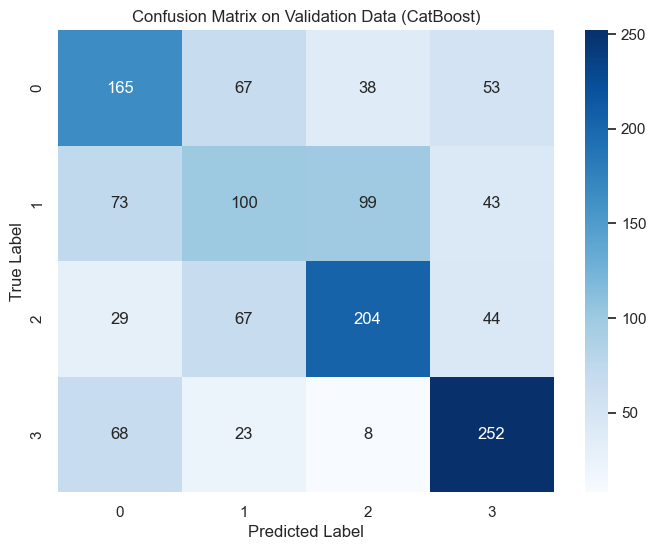

In [19]:
data_train_CB = data_train

# Separate the 'Segmentation' column (target variable) 
y_train_CB = data_train_CB['Segmentation']
X_train_CB = data_train_CB.drop(columns=['Segmentation'])

# Label Encode the target column for CatBoost
y_train_CB = LabelEncoder().fit_transform(y_train_CB)

# Identify Categorical Columns 
categorical_cols_CB = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Split the data into 80% training and 20% validation
X_train_split_CB, X_val_split_CB, y_train_split_CB, y_val_split_CB = train_test_split(
    X_train_CB, y_train_CB, test_size=0.2, random_state=42, stratify=y_train_CB)

# Initialize the CatBoost model
cat_model_CB = CatBoostClassifier(
    iterations=1000,            # Number of boosting iterations
    learning_rate=0.1,          # Learning rate for training
    depth=10,                   # Depth of each tree
    random_state=42,            # Random state for reproducibility
    verbose=100,                # Show training progress every 100 iterations
    loss_function='MultiClass'   # Multi-class classification
)

# Train the CatBoost model on the training set
cat_model_CB.fit(X_train_split_CB, y_train_split_CB, cat_features=categorical_cols_CB, eval_set=(X_val_split_CB, y_val_split_CB), use_best_model=True)

# Predictions on training data
y_train_pred_CB = cat_model_CB.predict(X_train_split_CB)
train_accuracy_CB = accuracy_score(y_train_split_CB, y_train_pred_CB)
print(f"CatBoost Accuracy on training set: {train_accuracy_CB}")

# Predictions on validation data
y_val_pred_CB = cat_model_CB.predict(X_val_split_CB)
val_accuracy_CB = accuracy_score(y_val_split_CB, y_val_pred_CB)
print(f"CatBoost Accuracy on validation set: {val_accuracy_CB}")

# Classification report for training data
print("\nClassification Report on Training Data (CatBoost):")
print(classification_report(y_train_split_CB, y_train_pred_CB))

# Classification report for validation data
print("\nClassification Report on Validation Data (CatBoost):")
print(classification_report(y_val_split_CB, y_val_pred_CB))

# Confusion Matrix for validation set
conf_matrix_CB = confusion_matrix(y_val_split_CB, y_val_pred_CB)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_CB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val_split_CB), yticklabels=np.unique(y_val_split_CB))
plt.title('Confusion Matrix on Validation Data (CatBoost)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


XGBoost

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Accuracy on training set after tuning: 0.9720555138784697
XGBoost Accuracy on validation set: 0.5153788447111778

Classification Report on Training Data (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1301
           1       0.98      0.94      0.96      1270
           2       0.94      0.99      0.97      1374
           3       0.99      0.98      0.99      1387

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332


Classification Report on Validation Data (XGBoost):
              precision    recall  f1-score   support

           0       0.40      0.43      0.42       315
           1       0.39      0.35      0.37       302
      

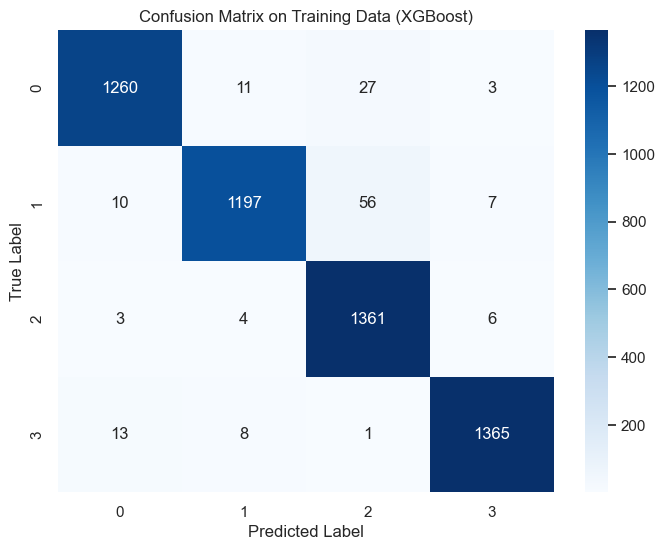

In [20]:
# Separate the 'Segmentation' column before one-hot encoding
y_train_XGB = data_train['Segmentation']
data_train_XGB = data_train.drop(columns=['Segmentation'])

# Encoding Categorical Variables using One-Hot Encoding
new_Data_train_XGB = pd.get_dummies(data_train_XGB, drop_first=True)

# Prepare X and y for XGBoost
X_XGB = new_Data_train_XGB.values  # Features (drop target)
y_XGB = LabelEncoder().fit_transform(y_train_XGB) 

# Split data into training and validation sets (80% train, 20% validation)
X_train_XGB, X_val_XGB, y_train_XGB, y_val_XGB = train_test_split(X_XGB, y_XGB, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV 
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],   # learning rates
    'max_depth': [10, 15, 20],           # max_depth 
    'n_estimators': [200, 400, 750],   # estimators 
    'subsample': [0.8, 1.0],             # data subsampling
}

# Set up the GridSearchCV for XGBoost
grid_search_XGB = GridSearchCV(
    estimator=XGBClassifier(objective="multi:softprob", random_state=42, n_jobs=-1),
    param_grid=param_grid_XGB,
    cv=5,  
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

# Fit the model using GridSearchCV
grid_search_XGB.fit(X_train_XGB, y_train_XGB)

# Print the best parameters from the grid search
print(f"Best Parameters for XGBoost: {grid_search_XGB.best_params_}")

# Make predictions using the best estimator
best_xgb = grid_search_XGB.best_estimator_

# Predictions on training data
y_train_pred_XGB = best_xgb.predict(X_train_XGB)
train_accuracy_XGB = accuracy_score(y_train_XGB, y_train_pred_XGB)
print(f"XGBoost Accuracy on training set after tuning: {train_accuracy_XGB}")

# Predictions on validation data
y_val_pred_XGB = best_xgb.predict(X_val_XGB)
val_accuracy_XGB = accuracy_score(y_val_XGB, y_val_pred_XGB)
print(f"XGBoost Accuracy on validation set: {val_accuracy_XGB}")

# Classification Report for training data
print("\nClassification Report on Training Data (XGBoost):")
print(classification_report(y_train_XGB, y_train_pred_XGB))

# Classification Report for validation data
print("\nClassification Report on Validation Data (XGBoost):")
print(classification_report(y_val_XGB, y_val_pred_XGB))

# Confusion Matrix for training data
conf_matrix_train_XGB = confusion_matrix(y_train_XGB, y_train_pred_XGB)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_train_XGB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train_XGB), yticklabels=np.unique(y_train_XGB))
plt.title('Confusion Matrix on Training Data (XGBoost)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Results Summary 
After using three unsupervised methods and three supervised methods my best results were with Catboost.  I was able to get vary high accuracy on my training data for XGBoost but on the validation set it performed equally as poorly as the rest of my methods. 


For logistic regression using grid search for hypermeter tuning I found that the best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Accuracy on training set after tuning: 0.52344336084021
Logistic Regression Accuracy on validation set after tuning: 0.5123780945236309


For Catboost I found that the ideal number of itterations was 72 with a learning rate of 0.1 and a depth of 10.
CatBoost Accuracy on training set: 0.6241560390097525
CatBoost Accuracy on validation set: 0.5408852213053263


For XGBoost using grid search for hyperameter tuning I found the best perameters to be: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Accuracy on training set after tuning: 0.9720555138784697
XGBoost Accuracy on validation set: 0.5153788447111778

Improve Model Further:
I think in order to do well in this challenge you would need to do multiple methods stacked on top of each other. If I had unlimited time I would continue to work towards implementing a model that combines a few different tree algorithms 
like XGBoost and Catboost. I cannot compare my results to others due to the competition being closed (there is nowhere to submit predictions on the testing set) but comparing my results on unseen 
training data via my validation set I can see there is room for improvement. 
